In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('merge_data_update.csv', index_col=0)

In [3]:
tdata = data.copy()

In [4]:
tdata

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ClassPr_S,ClassSc_S,SchD_S,TxD_S,LndAc_S,ImpAc_S,OthAc_S,HSTtl_D,HSTtl_S,GLA
0,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,Reg,...,RESIDENTIAL,1-STORY 1945 & OLDER,1.0,1.0,37300.0,0.0,111700.0,NaN,NaN,856.0
1,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,Reg,...,RESIDENTIAL,1-STORY TWNHM - 1946 & NEWER,1.0,1.0,43500.0,0.0,130600.0,NaN,NaN,1049.0
2,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,Reg,...,RESIDENTIAL,1-STORY 1945 & OLDER,1.0,1.0,41100.0,0.0,123200.0,NaN,NaN,1001.0
3,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,Reg,...,RESIDENTIAL,2-STORY 1945 & OLDER,1.0,1.0,31100.0,0.0,93300.0,NaN,4850.0,1039.0
4,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,Reg,...,RESIDENTIAL,2-STORY 1946 & NEWER,1.0,1.0,64300.0,0.0,192800.0,NaN,NaN,1665.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,Reg,...,RESIDENTIAL,1-STORY 1945 & OLDER,1.0,1.0,34600.0,0.0,103900.0,4850.0,4850.0,952.0
2576,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,IR1,...,RESIDENTIAL,1-STORY 1946 & NEWER ALL STYLES,1.0,1.0,46300.0,0.0,138800.0,NaN,NaN,1733.0
2577,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,Reg,...,RESIDENTIAL,DUPLEX - ALL STYLES AND AGES,1.0,1.0,45800.0,0.0,137400.0,NaN,NaN,2002.0
2578,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,Reg,...,RESIDENTIAL,2-STORY 1946 & NEWER,1.0,1.0,66300.0,0.0,198900.0,4850.0,4850.0,1842.0


In [5]:
tdata.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

## Drop Columns

In [6]:
drop_list = ['Street', 'Alley', 'Utilities', 'LandSlope','Condition2', 'MapRefNo', 'ZngCdPr', 'ZngOLPr', 'ZngOLSc', 
           'ClassSc_S', 'Heating', 'LowQualFinSF', 'KitchenAbvGr', 'RoofMatl', 'ExterCond', 'BsmtFinSF1', 
           'BsmtFinSF2', 'BsmtFinType2', 'GarageQual', 'GarageCond', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
            'ScreenPorch', 'PoolArea', 'PoolQC', 'MiscFeature', 'MiscVal', 'YrSold', 'SaleType', 'SaleCondition', 
             'HSTtl_D', 'HSTtl_S', 'GLA', 'MSZoning', 'HouseStyle', 'ClassPr_S', 'ImpAc_S', 'Exterior2nd', 'GarageYrBlt']

In [7]:
tdata = tdata.drop(drop_list, axis=1)

In [8]:
tdata.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'Fence', 'MoSold', 'GeoRefNo',
       'Prop_Addr', 'SchD_S', 'TxD_S', 'LndAc_S', 'OthAc_S'],
      dtype='object')

## For 'HeatingQC', combine the one 'Po' with 'Fa' and Dummify

In [9]:
# Check initial state
tdata['HeatingQC'].value_counts()

Ex    1293
TA     768
Gd     434
Fa      84
Po       1
Name: HeatingQC, dtype: int64

In [10]:
# Replace the one 'Po' with 'Fa'
tdata['HeatingQC'].replace('Po', 'Fa', inplace=True)

In [11]:
# Dummifying, dropping 'Ex' class' column.
HeatingQC_dums = pd.get_dummies(tdata['HeatingQC'], prefix='HeatingQC', prefix_sep='_').drop('HeatingQC_Ex',1)
tdata = pd.concat([tdata.drop('HeatingQC', 1), HeatingQC_dums], axis=1)

In [12]:
# Check it
tdata.iloc[:,-3:].value_counts()

HeatingQC_Fa  HeatingQC_Gd  HeatingQC_TA
0             0             0               1293
                            1                768
              1             0                434
1             0             0                 85
dtype: int64

## 'CentralAir': Making 'Y' == 1, and 'N' == 0

Will wait on answer for Luke as to what 0 and 1 should be ascribed to.

In [13]:
# Initial State
tdata['CentralAir'].value_counts()

Y    2417
N     163
Name: CentralAir, dtype: int64

In [14]:
# Transforming the column, Y == 1 and N == 0
tdata['CentralAir'].replace('Y', 1, inplace=True)
tdata['CentralAir'].replace('N', 0, inplace=True)

In [15]:
# Checking the transformation
tdata['CentralAir'].value_counts()

1    2417
0     163
Name: CentralAir, dtype: int64

## 'Electrical' - Fill NaN

If initial thought is correct, age of house should determine the electrical system. So YrBuilt for the missing value will tell us with high probability the electrical in the house.

In [16]:
# Find info on Year Built for each 'Electrical' class
tdata.groupby('Electrical')['YearBuilt'].agg(['mean', 'std'])

,mean,std
Electrical,,
FuseA,1937.797619,18.662319
FuseF,1933.461538,16.509720
FuseP,1926.000000,14.189198
SBrkr,1973.347569,28.652937


In [17]:
# Get the year for the missing value
tdata[tdata['Electrical'].isnull()].YearBuilt

2442    2006
Name: YearBuilt, dtype: int64

The YearBuilt for the observation with missing 'Electrical' is 2006, a clear sign that the value should be filled in with 'SBrkr'

In [18]:
# Initial State
print(tdata['Electrical'].value_counts())
print('Missing Values: ', np.sum(tdata['Electrical'].isnull()))

SBrkr    2365
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64
Missing Values:  1


In [19]:
# Filling the in missing value with 'SBrkr'
tdata['Electrical'].fillna(value='SBrkr', inplace=True)

In [20]:
# Checking the transformation
print(tdata['Electrical'].value_counts())
print('Missing Values: ', np.sum(tdata['Electrical'].isnull()))

SBrkr    2366
FuseA     168
FuseF      39
FuseP       7
Name: Electrical, dtype: int64
Missing Values:  0


## 'BsmtFullBath' - Fill Nan's

There are two missing values, check if those observations have basements.

In [21]:
tdata[tdata['BsmtFullBath'].isnull()].iloc[:,20:30]

,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical
912,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,1,FuseA
2308,TA,Slab,NaN,NaN,NaN,NaN,0.0,0.0,1,SBrkr


Confirmed that one has no information at all for any basement column, and one has 0 for TotalBsmtSF, so I am comfortable saying those missing values are because the houses in the observations don't have basements. Will set them to 0.

In [22]:
# Initial State
tdata['BsmtFullBath'].value_counts()

0.0    1485
1.0    1065
2.0      27
3.0       1
Name: BsmtFullBath, dtype: int64

In [23]:
# Filling in missing values with 0
tdata['BsmtFullBath'].fillna(value=0, inplace=True)

In [24]:
# Checking the transformation
print(tdata['BsmtFullBath'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtFullBath'].isnull()))

0.0    1487
1.0    1065
2.0      27
3.0       1
Name: BsmtFullBath, dtype: int64
Missing values:  0


## BsmtHalfBath - Fill NaN's

Should be the same as BsmtFullBath work. There are two missing values, check if those observations have basements.

In [25]:
tdata[tdata['BsmtHalfBath'].isnull()].iloc[:,20:30]

,ExterQual,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical
912,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,1,FuseA
2308,TA,Slab,NaN,NaN,NaN,NaN,0.0,0.0,1,SBrkr


It's the same rows of data as the above BsmtFullBath Nan's so treat them the same way. Fill with Zeros.

In [26]:
# Initial State
print(tdata['BsmtHalfBath'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtHalfBath'].isnull()))

0.0    2420
1.0     156
2.0       2
Name: BsmtHalfBath, dtype: int64
Missing values:  2


In [27]:
# Filling in missing values with 0
tdata['BsmtHalfBath'].fillna(value=0, inplace=True)

In [28]:
# Checking the transformation
print(tdata['BsmtHalfBath'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtHalfBath'].isnull()))

0.0    2422
1.0     156
2.0       2
Name: BsmtHalfBath, dtype: int64
Missing values:  0


## 'KitchenQual' - Combine the one 'Po' into 'Fa', Dummify

In [29]:
# Initial State
tdata['KitchenQual'].value_counts()

TA    1358
Gd    1017
Ex     142
Fa      62
Po       1
Name: KitchenQual, dtype: int64

In [ ]:
# Replace the one 'Po' with 'Fa'
tdata['KitchenQual'].replace('Po', 'Fa', inplace=True)

In [30]:
# Dummifying, dropping 'TA' class' column.
KitchenQual_dums = pd.get_dummies(tdata['KitchenQual'], prefix='KitchenQual', prefix_sep='_').drop('KitchenQual_TA',1)
tdata = pd.concat([tdata.drop('KitchenQual', 1), KitchenQual_dums], axis=1)

In [31]:
# Check the transformation
tdata.iloc[:,-4:].value_counts()

KitchenQual_Ex  KitchenQual_Fa  KitchenQual_Gd  KitchenQual_Po
0               0               0               0                 1358
                                1               0                 1017
1               0               0               0                  142
0               1               0               0                   62
                0               0               1                    1
dtype: int64

## 'YearRemodAdd' - Binarize for Y/N Remodeled, and create 'RemodelYrsAftBuilt'

In [32]:
# Remodeled houses had YearRemodAdd date AFTER YearBuilt.
# If the years are the same it means the house was not remodeled.
## Making a binary column. Later will have to see if it is useful.##
tdata['Remodeled'] = tdata['YearRemodAdd'] > tdata['YearBuilt']

In [33]:
# Diagnstic
# What percent of houses have been remodeled?
np.mean(tdata['Remodeled'])

0.4624031007751938

<AxesSubplot:title={'center':'SalePrice'}, xlabel='Remodeled'>

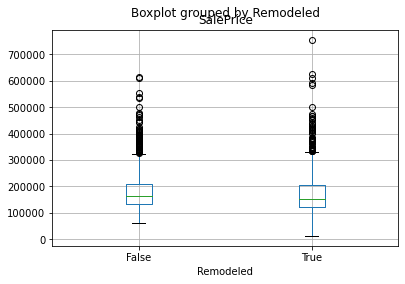

In [34]:
# Diagnostic
#Visualize the price differences
tdata.boxplot(column='SalePrice', by='Remodeled')

In [35]:
# Diagnostic
#Describing the remodel years for homes that have been remodeled.
tdata[tdata['Remodeled']==True].YearRemodAdd.describe()

count    1193.000000
mean     1986.029338
std        22.235884
min      1950.000000
25%      1958.000000
50%      1996.000000
75%      2004.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64

(0.0, 60.0)

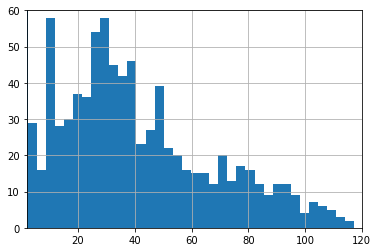

In [36]:
#Visualize what the column will be 
(tdata['YearRemodAdd'] - tdata['YearBuilt']).hist(bins=40)
plt.xlim(2,120)
plt.ylim(0, 60)

In [37]:
# Create Column 'RemodelYrsAftBuilt'
tdata['RemodelYrsAftBuilt'] = tdata['YearRemodAdd'] - tdata['YearBuilt']
tdata['RemodelYrsAftBuilt'].value_counts()
      

0      1386
1       352
30       34
40       29
25       24
       ... 
110       1
115       1
121       1
123       1
127       1
Name: RemodelYrsAftBuilt, Length: 116, dtype: int64

In [38]:
# See the new columns, show they look good.
tdata.iloc[:,-2:]

,Remodeled,RemodelYrsAftBuilt
0,True,11
1,False,0
2,True,77
3,True,103
4,False,0
...,...,...
2575,True,34
2576,False,0
2577,True,1
2578,False,0


 ## Functional - 3 Categories: Typ, Min, Maj(w/ mod, sal). Dummify

Note to self, I have edited and updated all this info in the notebook. Ready to start adding to it tomorrow morning.

In [42]:
# Initial State
tdata['Functional'].value_counts()

Typ     2399
Min2      66
Min1      57
Mod       32
Maj1      18
Maj2       7
Sal        1
Name: Functional, dtype: int64

In [43]:
# Combine the Min1, Min2 into a Min category. Combine the Maj1, Maj2, Mod, and Sal into a Maj category
tdata['Functional'].replace(['Min1', 'Min2'], 'Min', inplace=True)
tdata['Functional'].replace(['Maj1', 'Maj2', 'Mod', 'Sal'], 'Maj', inplace=True)

In [44]:
# Check the result
tdata['Functional'].value_counts()

Typ    2399
Min     123
Maj      58
Name: Functional, dtype: int64

In [45]:
# Dummify the column, drop Typ (modal value)
Functional_dums = pd.get_dummies(tdata['Functional'], prefix='Functional', prefix_sep='_').drop('Functional_Typ',1)
tdata = pd.concat([tdata.drop('Functional', 1), Functional_dums], axis=1)

In [46]:
# Check the transformation
tdata.iloc[:,-2:].value_counts()

Functional_Maj  Functional_Min
0               0                 2399
                1                  123
1               0                   58
dtype: int64

## RoofStyle - Combine into Hip, Gabel, Other. Then Dummify.

In [47]:
# Initial State
tdata['RoofStyle'].value_counts()

Gable      2059
Hip         473
Gambrel      18
Flat         16
Mansard      10
Shed          4
Name: RoofStyle, dtype: int64

In [49]:
# Combine Gambrel, Flat, Mansard, and Shed into 'Other'
tdata['RoofStyle'].replace(['Gambrel', 'Flat', 'Mansard', 'Shed'], 'Other', inplace=True)

In [52]:
# Dummify, drop Gable (modal value)
RoofStyle_dums = pd.get_dummies(tdata['RoofStyle'], prefix='RoofStyle', prefix_sep='_').drop('RoofStyle_Gable',1)
pd.concat([tdata.drop('RoofStyle', axis=1), RoofStyle_dums], axis=1)

,PID,GrLivArea,SalePrice,MSSubClass,LotFrontage,LotArea,LotShape,LandContour,LotConfig,Neighborhood,...,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_Po,Remodeled,RemodelYrsAftBuilt,Functional_Maj,Functional_Min,RoofStyle_Hip,RoofStyle_Other
0,909176150,856,126000,30,NaN,7890,Reg,Lvl,Corner,SWISU,...,0,0,0,0,True,11,0,0,0,0
1,905476230,1049,139500,120,42.0,4235,Reg,Lvl,Inside,Edwards,...,0,0,1,0,False,0,0,0,0,0
2,911128020,1001,124900,30,60.0,6060,Reg,Lvl,Inside,IDOTRR,...,0,0,1,0,True,77,0,0,1,0
3,535377150,1039,114000,70,80.0,8146,Reg,Lvl,Corner,OldTown,...,0,0,0,0,True,103,0,0,0,0
4,534177230,1665,227000,60,70.0,8400,Reg,Lvl,Inside,NWAmes,...,0,0,1,0,False,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,903205040,952,121000,30,NaN,8854,Reg,Lvl,Inside,BrkSide,...,0,1,0,0,True,34,0,0,0,0
2576,905402060,1733,139600,20,NaN,13680,IR1,Lvl,CulDSac,Edwards,...,0,0,0,0,False,0,0,1,1,0
2577,909275030,2002,145000,90,82.0,6270,Reg,HLS,Inside,Crawfor,...,0,0,0,0,True,1,0,0,0,0
2578,907192040,1842,217500,60,NaN,8826,Reg,Lvl,Inside,CollgCr,...,0,0,1,0,False,0,0,0,0,0


In [54]:
# Check the Transformation
tdata.iloc[:, -2:].value_counts()

Functional_Maj  Functional_Min
0               0                 2399
                1                  123
1               0                   58
dtype: int64

## Exterior1st - Combine Categories into similar materials, then dummify.

Materials to combine:
Value, roughly, high to low.

No stone houses. 

Common brick is a significant upgrade, can't be combined. Not even sure what to combine it with based on value, its definitely the leader.

Vinyl Siding

Plywood - Better than hardboard, so should be its own category.

Wood shingles - its own category.

Stucco - Possibly similar enough to Cement Board (value-wise) to be combined with it.
Cement Board - Put w/ Wood siding, similar traits/value/looks, different materials.

Metal Siding - definitely its own category.

Cinderblock - Other, not used in a while (inferior to concrete)
Precast - Other (not different enough from other 'Other's to be significant)
Asphalt Shingles - Other (not different enough from other 'Other's to be significant)
Immitation Stucco - Other.

Hardboard - it's own category, cheapo finish.

Asbestos shingles means old, not used in last 50 years. (banned in the 70's) Maybe drop.

In [55]:
# Inital State
tdata['Exterior1st'].value_counts()

VinylSd    868
HdBoard    416
MetalSd    407
Wd Sdng    385
Plywood    194
CemntBd     97
BrkFace     80
WdShing     51
Stucco      37
AsbShng     34
BrkComm      5
CBlock       2
AsphShn      2
ImStucc      1
PreCast      1
Name: Exterior1st, dtype: int64

In [60]:
# Combine Stucco, Cement Board, and Wood siding (based on value). New cat called Stc_CemBd_WdSd
tdata['Exterior1st'].replace(['Stucco', 'CemntBd', 'Wd Sdng'], 'Stc_CemBd_WdSd', inplace=True)
# Combine Cinderblock, Precast, Asphalt Singles, Imitation Stucco into other.
tdata['Exterior1st'].replace(['CBlock', 'PreCast', 'AsphShn', 'ImStucc'], 'Other', inplace=True)

# Potentially drop asbestos shingles, no longer used (actually banned) and might be captured in age of house. 
# Or, conversely, might be a significant negative.

In [61]:
# Check the combinations
tdata['Exterior1st'].value_counts()

VinylSd           868
Stc_CemBd_WdSd    519
HdBoard           416
MetalSd           407
Plywood           194
BrkFace            80
WdShing            51
AsbShng            34
Other               6
BrkComm             5
Name: Exterior1st, dtype: int64

Still an aweful lot of categories. Maybe combine BrkComm with VinylSd and Plywood. (even though it is more valuable), and maybe combine Other with HdBoard (both low-value cats, even if different). Maybe combine wood shingles withCemBd_WdSd. Talk to team.

VinylSd, BrkComm, Plywood
HdBoard, Other
WdShing, Stc_CemBd_WdSd (Stucco, Cement Board, Wood Siding)

In [63]:
# Combine Wood shingles into Stc_CemBd_WdSd
tdata['Exterior1st'].replace(['Stc_CemBd_WdSd', 'WdShing'], 'Stc_CemBd_WdSdSh', inplace=True)
# Combine BrkComm with VinylSd, Plywood. 
tdata['Exterior1st'].replace(['BrkComm', 'VinylSd', 'Plywood'], 'VinylPlywBrkcom', inplace=True)
# Combine HdBoard and Other
tdata['Exterior1st'].replace(['Other', 'HdBoard'], 'HdbdOther', inplace=True)

In [64]:
tdata['Exterior1st'].value_counts()

VinylPlywBrkcom     1067
Stc_CemBd_WdSdSh     570
HdbdOther            422
MetalSd              407
BrkFace               80
AsbShng               34
Name: Exterior1st, dtype: int64

In [67]:
# Dummify, and drop VinylPlywBrkcom (modal) class
Exterior1st_dums = pd.get_dummies(tdata['Exterior1st'], prefix='Exterior1st', 
                                  prefix_sep='_').drop('Exterior1st_VinylPlywBrkcom', axis=1)
tdata = pd.concat([tdata.drop('Exterior1st', axis=1), Exterior1st_dums], axis=1)

In [68]:
# Check the Transformation
tdata.iloc[:, -5:].value_counts()

Exterior1st_AsbShng  Exterior1st_BrkFace  Exterior1st_HdbdOther  Exterior1st_MetalSd  Exterior1st_Stc_CemBd_WdSdSh
0                    0                    0                      0                    0                               1067
                                                                                      1                                570
                                          1                      0                    0                                422
                                          0                      1                    0                                407
                     1                    0                      0                    0                                 80
1                    0                    0                      0                    0                                 34
dtype: int64

## MasVnrType - Combine Bricks, Investigate Nulls, Dummify

In [71]:
# Initial state
print(tdata['MasVnrType'].value_counts())
print('Mising values: ', np.sum(tdata['MasVnrType'].isnull()))

None       1559
BrkFace     804
Stone       183
BrkCmn       20
Name: MasVnrType, dtype: int64
Mising values:  14


In [85]:
tdata[tdata['MasVnrType'].isnull()].iloc[:,60:70] # Changed the column indees to investigate

,Remodeled,RemodelYrsAftBuilt,Functional_Maj,Functional_Min,Exterior1st_AsbShng,Exterior1st_BrkFace,Exterior1st_HdbdOther,Exterior1st_MetalSd,Exterior1st_Stc_CemBd_WdSdSh
175,True,1,0,0,0,0,0,0,0
358,True,1,0,0,0,0,0,0,1
753,True,1,0,0,0,0,0,0,0
787,False,0,0,0,0,0,0,0,0
871,False,0,0,0,0,0,0,0,0
891,False,0,0,0,0,0,0,0,0
951,False,0,0,0,0,0,0,0,0
1041,False,0,0,0,0,0,0,0,0
1161,False,0,0,0,0,0,0,0,0
1355,False,0,0,0,0,0,0,0,1


From inspection, these null-values are in rows that:
1) Are of all different zoning types.
2) 1/3 have missing lot frontage
3) Most are 1Fam building types
4) Built in 2000 or later.
5) NaN for MasVnrArea
6) Foundations are all PConc
7) Most have paved drives and garages
8) All have NaN for Fence

Don't see any special relatinoships, and none have MasVnrArea, so going to fill these NaN's in as None (the mode)

In [86]:
# Filling in missing values with 'None'
tdata['MasVnrType'].fillna(value='None', inplace=True)

In [87]:
# Checking the transformation
print(tdata['MasVnrType'].value_counts())
print('Missing values: ', np.sum(tdata['MasVnrType'].isnull()))

None       1573
BrkFace     804
Stone       183
BrkCmn       20
Name: MasVnrType, dtype: int64
Missing values:  0


In [89]:
# Combining Stone and BrkCmn, those are both much higher value than BrkFace.
tdata['MasVnrType'].replace(['Stone', 'BrkCmn'], 'StoneBrkcom', inplace=True)

In [90]:
# Checking the transformation
tdata['MasVnrType'].value_counts()

None           1573
BrkFace         804
StoneBrkcom     203
Name: MasVnrType, dtype: int64

In [95]:
# Create dummy columns
MasVnrType_dums = pd.get_dummies(tdata['MasVnrType'], prefix='MasVnrType', 
                                 prefix_sep='_').drop('MasVnrType_None', axis=1)
tdata = pd.concat([tdata.drop('MasVnrType', axis=1), MasVnrType_dums], axis=1)

In [98]:
tdata.iloc[:,-2:].value_counts()

MasVnrType_BrkFace  MasVnrType_StoneBrkcom
0                   0                         1573
1                   0                          804
0                   1                          203
dtype: int64

## MasVnrArea - Fill NaN's

Already found out that the NaN's in this column are the same as the ones in the MasVnrType column above. I filled those in with None for type so am filling these in with 0 for Area.

In [100]:
# Initial State
print(tdata['MasVnrArea'].value_counts())
print('Missing Values: ', np.sum(tdata['MasVnrArea'].isnull()))
#Numerical variable, with a large amount of Zeros.

0.0       1554
120.0       13
216.0       11
108.0       10
176.0       10
          ... 
604.0        1
11.0         1
1129.0       1
673.0        1
1159.0       1
Name: MasVnrArea, Length: 416, dtype: int64
Missing Values:  14


In [102]:
# Now filling the NaN's with zeros
tdata['MasVnrArea'].fillna(value=0, inplace=True)

In [103]:
# Check that our fills went correctly
print(tdata['MasVnrArea'].value_counts())
print('Missing Values: ', np.sum(tdata['MasVnrArea'].isnull()))

0.0       1568
120.0       13
216.0       11
108.0       10
176.0       10
          ... 
604.0        1
11.0         1
1129.0       1
673.0        1
1159.0       1
Name: MasVnrArea, Length: 416, dtype: int64
Missing Values:  0


## Foundation - Dummify
Maybe condense later. Potentially ask Mr. Burakowski

In [104]:
tdata['Foundation'].value_counts()

CBlock    1140
PConc     1105
BrkTil     278
Slab        42
Stone       10
Wood         5
Name: Foundation, dtype: int64

In [106]:
# Create dummy columns
Foundation_dums = pd.get_dummies(tdata['Foundation'], prefix='Foundation', 
                                 prefix_sep='_').drop('Foundation_CBlock', axis=1)
tdata = pd.concat([tdata.drop('Foundation', axis=1), Foundation_dums], axis=1)

In [107]:
# Check the dummification
tdata.iloc[:,-5:].value_counts()

Foundation_BrkTil  Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood
0                  0                 0                0                 0                  1140
                   1                 0                0                 0                  1105
1                  0                 0                0                 0                   278
0                  0                 1                0                 0                    42
                                     0                1                 0                    10
                                                      0                 1                     5
dtype: int64

## BsmtQual - No Basement cat from NaN's, Combine 'Po' into 'Fa', Dummify

In [109]:
# Initial State
print(tdata['BsmtQual'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtQual'].isnull()))

TA    1166
Gd    1077
Ex     188
Fa      78
Po       2
Name: BsmtQual, dtype: int64
Missing values:  69


In [110]:
# Combine 'Po' into 'Fa'
tdata['BsmtQual'].replace('Po', 'Fa', inplace=True)
# Make 'None' category for NaN's
tdata['BsmtQual'].fillna(value='None', inplace=True)

In [111]:
# Check Transformation
print(tdata['BsmtQual'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtQual'].isnull()))

TA      1166
Gd      1077
Ex       188
Fa        80
None      69
Name: BsmtQual, dtype: int64
Missing values:  0


In [112]:
# Create dummy columns
BsmtQual_dums = pd.get_dummies(tdata['BsmtQual'], prefix='BsmtQual', 
                                 prefix_sep='_').drop('BsmtQual_TA', axis=1)
tdata = pd.concat([tdata.drop('BsmtQual', axis=1), BsmtQual_dums], axis=1)

In [113]:
# Check the dummification
tdata.iloc[:,-4:].value_counts()

BsmtQual_Ex  BsmtQual_Fa  BsmtQual_Gd  BsmtQual_None
0            0            0            0                1166
                          1            0                1077
1            0            0            0                 188
0            1            0            0                  80
             0            0            1                  69
dtype: int64

## BsmtCond - Combine 'Po' into 'Fa', 'Ex' into 'Gd'. Fill NaN's w/ 'None', the Dummify

In [120]:
# Initial State
print(tdata['BsmtCond'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtCond'].isnull()))

TA    2316
Gd     101
Fa      88
Ex       3
Po       3
Name: BsmtCond, dtype: int64
Missing values:  69


In [121]:
# Combine 'Po' into 'Fa', and 'Ex' into 'Gd'
tdata['BsmtCond'].replace('Po', 'Fa', inplace=True)
tdata['BsmtCond'].replace('Ex', 'Gd', inplace=True)
# Fill NaN's with 'None'
tdata['BsmtCond'].fillna(value='None', inplace=True)

In [122]:
# Checking the transformation
tdata['BsmtCond'].value_counts()

TA      2316
Gd       104
Fa        91
None      69
Name: BsmtCond, dtype: int64

In [123]:
# Create dummy columns
BsmtCond_dums = pd.get_dummies(tdata['BsmtCond'], prefix='BsmtCond', 
                                 prefix_sep='_').drop('BsmtCond_TA', axis=1)
tdata = pd.concat([tdata.drop('BsmtCond', axis=1), BsmtCond_dums], axis=1)

In [124]:
# Check the dummification
tdata.iloc[:,-3:].value_counts()

BsmtCond_Fa  BsmtCond_Gd  BsmtCond_None
0            0            0                2316
             1            0                 104
1            0            0                  91
0            0            1                  69
dtype: int64

## BsmtExposure - Create a binary y/n. 'Gd', 'Av' == 1, rest == 0

Need to figure out what the two NaN's are that are not similar to the rest of the basement column NaN's and decide what to do with them.

In [131]:
expose_df = tdata[tdata['BsmtExposure'].isnull()]
cond_df = data[data['BsmtCond'].isnull()]
#The rows not shared w/ other Bsmt Columns
expose_df[~expose_df.index.isin(cond_df.index)].iloc[:, 20:30]

,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,CentralAir,Electrical,1stFlrSF,2ndFlrSF,BsmtFullBath,BsmtHalfBath,FullBath
813,Unf,936.0,936.0,1,SBrkr,936,840,0.0,0.0,2
1201,Unf,1595.0,1595.0,1,SBrkr,1595,0,0.0,0.0,2


These both are unfinished basements in 1Fam houses, so I am going to the the BsmtExposure values to the modal value, 'No'

In [133]:
# Initial State
print(tdata['BsmtExposure'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtExposure'].isnull()))

No    1708
Av     344
Gd     242
Mn     215
Name: BsmtExposure, dtype: int64
Missing values:  71


In [134]:
# Fill in the two unique NaN's with 'No'. Same for the rest of the NaN's.
tdata['BsmtExposure'].fillna(value='No', inplace=True)
# Combine Gd, Av into '1', combine Mn, No into '0'
tdata['BsmtExposure'].replace(['Gd', 'Av'], 1, inplace=True)
tdata['BsmtExposure'].replace(['Mn', 'No'], 0, inplace=True)

In [135]:
# Check Transformation
print(tdata['BsmtExposure'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtExposure'].isnull()))

0    1994
1     586
Name: BsmtExposure, dtype: int64
Missing values:  0


## BsmtFinType1 - Binarize, Good Living (y or n)

In [136]:
# Initial State
print(tdata['BsmtFinType1'].value_counts())
print('Missing values: ', np.sum(tdata['BsmtFinType1'].isnull()))

GLQ    753
Unf    706
ALQ    397
Rec    265
BLQ    251
LwQ    139
Name: BsmtFinType1, dtype: int64
Missing values:  69


In [137]:
# Fill missing values with Unf (this is okay since I am dropping that class)
tdata['BsmtFinType1'].fillna(value='Unf', inplace=True)
# Change GLQ to 1, the rest to 0
tdata['BsmtFinType1'].replace(['Unf', 'ALQ', 'Rec', 'BLQ', 'LwQ'], 0, inplace=True)
tdata['BsmtFinType1'].replace(['GLQ'], 1, inplace=True)

In [138]:
# Check Transformation
tdata['BsmtFinType1'].value_counts()

0    1827
1     753
Name: BsmtFinType1, dtype: int64

In [ ]:
Note: Maybe change the name of this column to be more descriptive.